## Load Data into a single DataFrame.


In [ ]:
import pandas as pd

# List of CSV file paths
file_paths = [
    '/content/api_data_aadhar_biometric_0_500000.csv',
    '/content/api_data_aadhar_biometric_500000_1000000.csv',
    '/content/api_data_aadhar_biometric_1000000_1500000.csv',
    '/content/api_data_aadhar_biometric_1500000_1861108.csv'
]

# Initialize an empty list to store individual DataFrames
dataframes = []

# Loop through file paths, read each CSV, and append to the list
for file in file_paths:
    df_temp = pd.read_csv(file)
    dataframes.append(df_temp)

# Concatenate all DataFrames into a single DataFrame
df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows
print("First 5 rows of the combined DataFrame:")
print(df.head())
print("\nInformation about the combined DataFrame:")
df.info()

First 5 rows of the combined DataFrame:
         date              state      district  pincode  bio_age_5_17  \
0  01-03-2025            Haryana  Mahendragarh   123029           280   
1  01-03-2025              Bihar     Madhepura   852121           144   
2  01-03-2025  Jammu and Kashmir         Punch   185101           643   
3  01-03-2025              Bihar       Bhojpur   802158           256   
4  01-03-2025         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  
0          577  
1          369  
2         1091  
3          980  
4          815  

Information about the combined DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


## Handle Missing Values

.


In [ ]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64


## Remove Duplicates



In [ ]:
print(f"Number of duplicate rows before removal: {df.duplicated().sum()}")

Number of duplicate rows before removal: 94896


In [ ]:
df.drop_duplicates(inplace=True)
print(f"Number of duplicate rows after removal: {df.duplicated().sum()}")

Number of duplicate rows after removal: 0


## Standardize Formats




In [ ]:
print("Current column names:")
print(df.columns)
df.info()

Current column names:
Index(['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 1766212 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.3+ MB


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print("Data type of 'date' column after conversion:")
print(df['date'].dtype)

Data type of 'date' column after conversion:
datetime64[ns]


In [ ]:
print(f"Number of unique states: {df['state'].nunique()} (Total rows: {len(df)})")
print(f"Number of unique districts: {df['district'].nunique()} (Total rows: {len(df)})")

Number of unique states: 57 (Total rows: 1766212)
Number of unique districts: 974 (Total rows: 1766212)


## Split Date Column





In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

print("First 5 rows of the DataFrame with new 'year', 'month', and 'day' columns:")
print(df.head())

print("\nData types of all columns after splitting the 'date' column:")
print(df.dtypes)

First 5 rows of the DataFrame with new 'year', 'month', and 'day' columns:
        date              state      district  pincode  bio_age_5_17  \
0 2025-03-01            Haryana  Mahendragarh   123029           280   
1 2025-03-01              Bihar     Madhepura   852121           144   
2 2025-03-01  Jammu and Kashmir         Punch   185101           643   
3 2025-03-01              Bihar       Bhojpur   802158           256   
4 2025-03-01         Tamil Nadu       Madurai   625514           271   

   bio_age_17_  year  month  day  
0          577  2025      3    1  
1          369  2025      3    1  
2         1091  2025      3    1  
3          980  2025      3    1  
4          815  2025      3    1  

Data types of all columns after splitting the 'date' column:
date            datetime64[ns]
state                   object
district                object
pincode                  int64
bio_age_5_17             int64
bio_age_17_              int64
year                     int32
mon

## Correct Errors



In [ ]:
print("Unique values and counts for 'state' column:")
print(df['state'].value_counts())

Unique values and counts for 'state' column:
state
Tamil Nadu                                  174934
Andhra Pradesh                              160202
Uttar Pradesh                               147138
Maharashtra                                 143609
Karnataka                                   135780
West Bengal                                 125274
Kerala                                       93951
Gujarat                                      84630
Odisha                                       83177
Bihar                                        78078
Telangana                                    77850
Rajasthan                                    76698
Madhya Pradesh                               66020
Punjab                                       46414
Assam                                        44418
Jharkhand                                    35054
Chhattisgarh                                 30048
Himachal Pradesh                             28723
Haryana                        

In [ ]:
df['state'] = df['state'].replace({
    'Orissa': 'Odisha',
    'ODISHA': 'Odisha',
    'Jammu & Kashmir': 'Jammu and Kashmir',
    'Andaman & Nicobar Islands': 'Andaman and Nicobar Islands',
    'Daman & Diu': 'Daman and Diu',
    'Dadra & Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu',
    'Dadra and Nagar Haveli': 'Dadra and Nagar Haveli and Daman and Diu', # Consolidate older entries into merged UT
    'West Bangal': 'West Bengal',
    'WEST BENGAL': 'West Bengal',
    'West  Bengal': 'West Bengal',
    'Westbengal': 'West Bengal',
    'West bengal': 'West Bengal',
    'west Bengal': 'West Bengal',
    'WESTBENGAL': 'West Bengal',
    'andhra pradesh': 'Andhra Pradesh',
    'Chhatisgarh': 'Chhattisgarh',
    'Uttaranchal': 'Uttarakhand',
    'Tamilnadu': 'Tamil Nadu'
})

print("Unique values and counts for 'state' column after correction:")
print(df['state'].value_counts())

Unique values and counts for 'state' column after correction:
state
Tamil Nadu                                  174935
Andhra Pradesh                              160232
Uttar Pradesh                               147138
Maharashtra                                 143609
Karnataka                                   135780
West Bengal                                 125422
Odisha                                       95969
Kerala                                       93951
Gujarat                                      84630
Bihar                                        78078
Telangana                                    77850
Rajasthan                                    76698
Madhya Pradesh                               66020
Punjab                                       46414
Assam                                        44418
Jharkhand                                    35054
Chhattisgarh                                 30053
Himachal Pradesh                             28723
Haryana       

In [ ]:
print("Unique values and counts for 'district' column:")
print(df['district'].value_counts())

Unique values and counts for 'district' column:
district
Pune                 11068
Thrissur             10594
North 24 Parganas    10128
Barddhaman           10079
East Godavari         9872
                     ...  
Mahoba *                 1
BALANGIR                 1
Chandauli *              1
Poonch                   1
Salumbar                 1
Name: count, Length: 974, dtype: int64


In [ ]:

# Remove special characters like '*' and '?' and standardize casing
df['district'] = df['district'].apply(lambda x: x.replace('*', '').strip().title())
df['district'] = df['district'].replace({'?': None})

print("Unique values and counts for 'district' column after correction:")
print(df['district'].value_counts())

Unique values and counts for 'district' column after correction:
district
Pune                 11068
Thrissur             10594
North 24 Parganas    10128
Barddhaman           10079
East Godavari         9872
                     ...  
Nicobars                 2
Akhera                   1
Bandipur                 1
Poonch                   1
Salumbar                 1
Name: count, Length: 928, dtype: int64


In [ ]:
print("Descriptive statistics for numerical columns:")
print(df[['pincode', 'bio_age_5_17', 'bio_age_17_']].describe())

Descriptive statistics for numerical columns:
            pincode  bio_age_5_17   bio_age_17_
count  1.766212e+06  1.766212e+06  1.766212e+06
mean   5.217314e+05  1.894260e+01  1.970568e+01
std    1.983382e+05  8.581746e+01  9.030576e+01
min    1.100010e+05  0.000000e+00  0.000000e+00
25%    3.911500e+05  1.000000e+00  1.000000e+00
50%    5.224390e+05  4.000000e+00  4.000000e+00
75%    6.866810e+05  1.100000e+01  1.000000e+01
max    8.554560e+05  8.002000e+03  7.625000e+03


## Handle Outliers




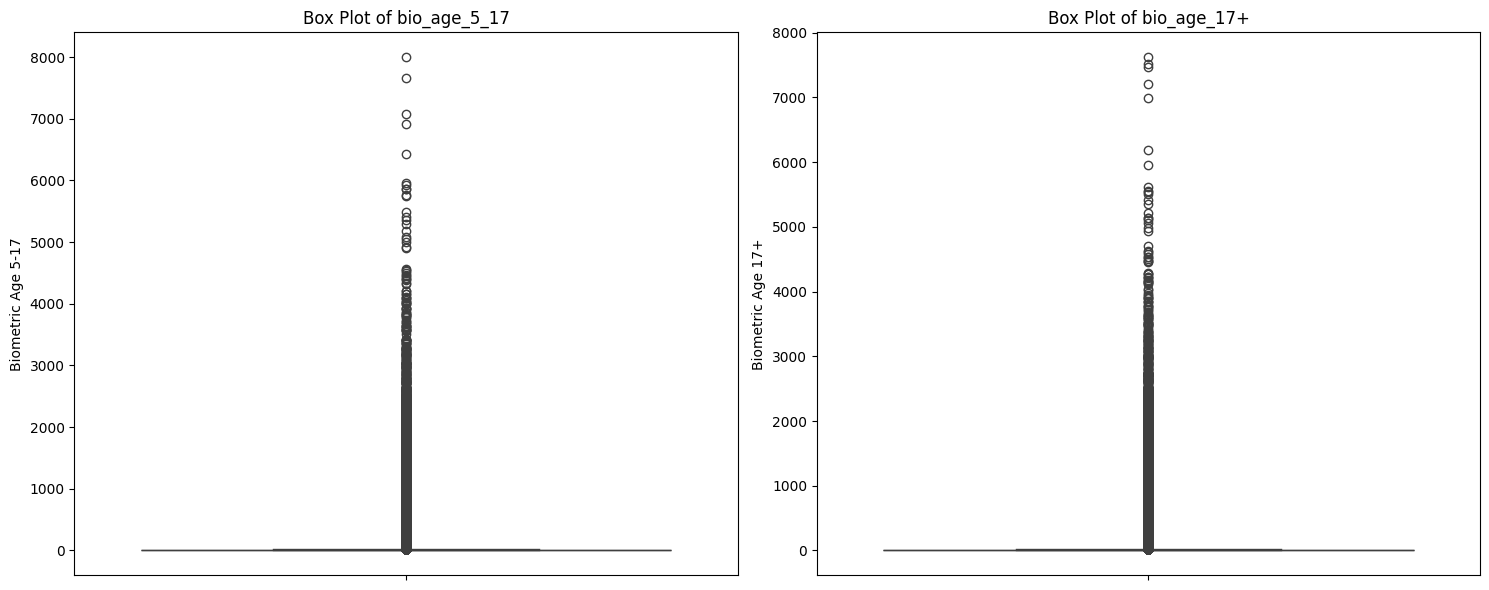

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for better visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box plot for 'bio_age_5_17'
sns.boxplot(y=df['bio_age_5_17'], ax=axes[0])
axes[0].set_title('Box Plot of bio_age_5_17')
axes[0].set_ylabel('Biometric Age 5-17')

# Box plot for 'bio_age_17_'
sns.boxplot(y=df['bio_age_17_'], ax=axes[1])
axes[1].set_title('Box Plot of bio_age_17+')
axes[1].set_ylabel('Biometric Age 17+')

plt.tight_layout()
plt.show()

In [ ]:
Q1_5_17 = df['bio_age_5_17'].quantile(0.25)
Q3_5_17 = df['bio_age_5_17'].quantile(0.75)
IQR_5_17 = Q3_5_17 - Q1_5_17
lower_bound_5_17 = Q1_5_17 - 1.5 * IQR_5_17
upper_bound_5_17 = Q3_5_17 + 1.5 * IQR_5_17

Q1_17_ = df['bio_age_17_'].quantile(0.25)
Q3_17_ = df['bio_age_17_'].quantile(0.75)
IQR_17_ = Q3_17_ - Q1_17_
lower_bound_17_ = Q1_17_ - 1.5 * IQR_17_
upper_bound_17_ = Q3_17_ + 1.5 * IQR_17_

print(f"IQR for bio_age_5_17: {IQR_5_17}")
print(f"Outlier bounds for bio_age_5_17: ({lower_bound_5_17}, {upper_bound_5_17})")
print(f"\nIQR for bio_age_17_: {IQR_17_}")
print(f"Outlier bounds for bio_age_17_: ({lower_bound_17_}, {upper_bound_17_})")

IQR for bio_age_5_17: 10.0
Outlier bounds for bio_age_5_17: (-14.0, 26.0)

IQR for bio_age_17_: 9.0
Outlier bounds for bio_age_17_: (-12.5, 23.5)


In [ ]:
outliers_5_17 = df[(df['bio_age_5_17'] < lower_bound_5_17) | (df['bio_age_5_17'] > upper_bound_5_17)]
outliers_17_ = df[(df['bio_age_17_'] < lower_bound_17_) | (df['bio_age_17_'] > upper_bound_17_)]

print(f"Number of outliers in bio_age_5_17: {len(outliers_5_17)}")
print(f"Number of outliers in bio_age_17_: {len(outliers_17_)}")

Number of outliers in bio_age_5_17: 201325
Number of outliers in bio_age_17_: 210205


In [ ]:
print("\nData types of all columns:")
print(df.dtypes)


Data types of all columns:
date            datetime64[ns]
state                   object
district                object
pincode                  int64
bio_age_5_17             int64
bio_age_17_              int64
year                     int32
month                    int32
day                      int32
dtype: object


In [ ]:
print(f"Shape of the cleaned DataFrame: {df.shape}")

Shape of the cleaned DataFrame: (1766212, 9)


In [ ]:
print("First 5 rows of the cleaned DataFrame:")
display(df.head())

First 5 rows of the cleaned DataFrame:


,date,state,district,pincode,bio_age_5_17,bio_age_17_,year,month,day
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,2025,3,1
1,2025-03-01,Bihar,Madhepura,852121,144,369,2025,3,1
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,2025,3,1
3,2025-03-01,Bihar,Bhojpur,802158,256,980,2025,3,1
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,2025,3,1


## Distribution of Biometric Age Groups




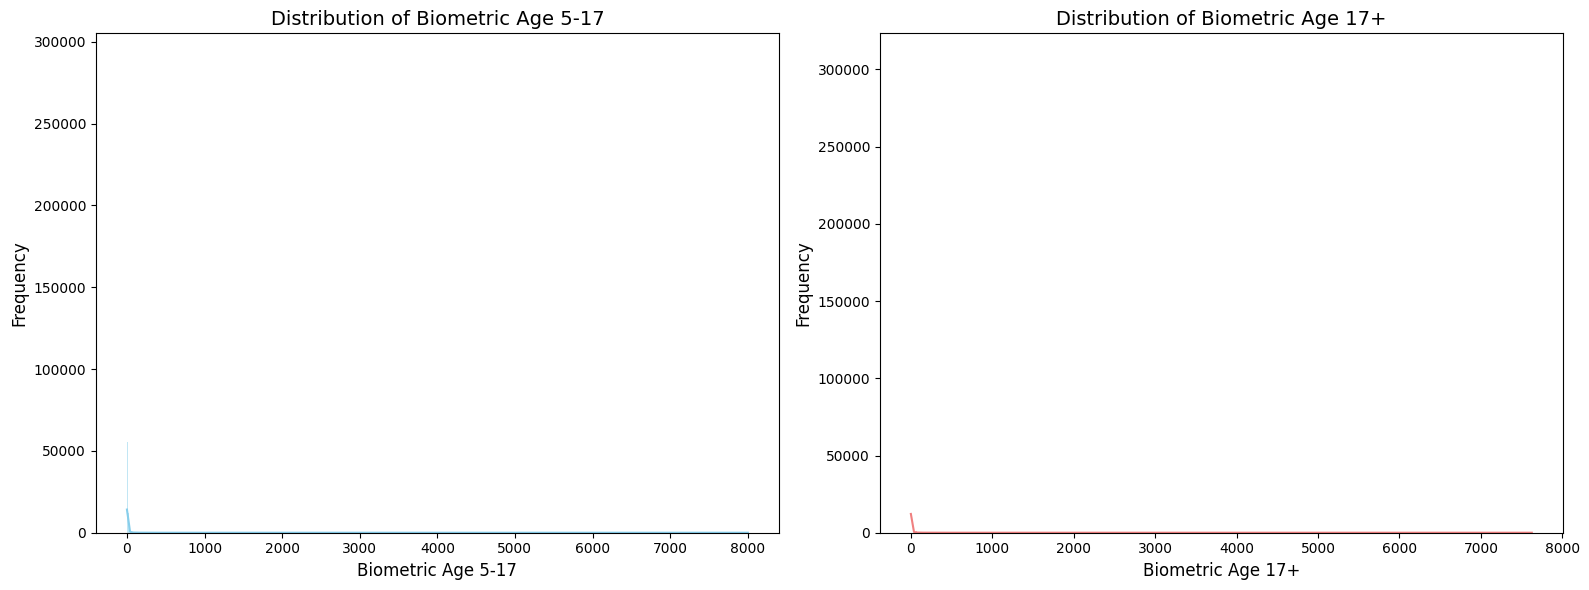

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram and KDE for 'bio_age_5_17'
sns.histplot(df['bio_age_5_17'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Biometric Age 5-17', fontsize=14)
axes[0].set_xlabel('Biometric Age 5-17', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Histogram and KDE for 'bio_age_17_'
sns.histplot(df['bio_age_17_'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of Biometric Age 17+', fontsize=14)
axes[1].set_xlabel('Biometric Age 17+', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout and display plots
plt.tight_layout()
plt.show()

## Biometric Activity Over Time



In [ ]:
df_time_series = df.groupby(['year', 'month'])[['bio_age_5_17', 'bio_age_17_']].sum().reset_index()
df_time_series['year_month'] = pd.to_datetime(df_time_series['year'].astype(str) + '-' + df_time_series['month'].astype(str) + '-01')


First 5 rows of df_time_series:
   year  month  bio_age_5_17  bio_age_17_ year_month
0  2025      3       3733578      4588644 2025-03-01
1  2025      4       4356896      4284783 2025-04-01
2  2025      5       3868247      4011709 2025-05-01
3  2025      6       3710149      4189140 2025-06-01
4  2025      7       4499057      5293495 2025-07-01

Information about df_time_series:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          9 non-null      int32         
 1   month         9 non-null      int32         
 2   bio_age_5_17  9 non-null      int64         
 3   bio_age_17_   9 non-null      int64         
 4   year_month    9 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int32(2), int64(2)
memory usage: 420.0 bytes


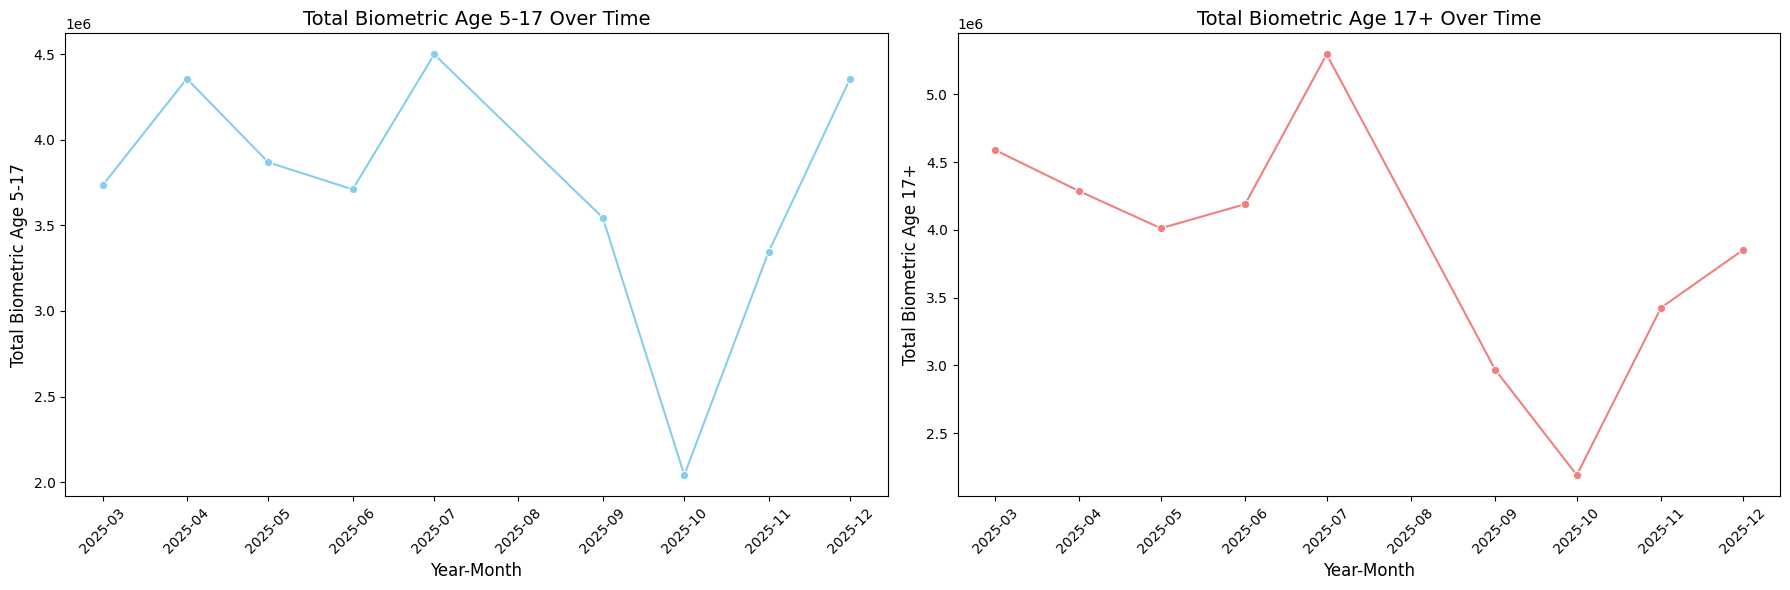

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for bio_age_5_17
sns.lineplot(x='year_month', y='bio_age_5_17', data=df_time_series, marker='o', ax=axes[0], color='skyblue')
axes[0].set_title('Total Biometric Age 5-17 Over Time', fontsize=14)
axes[0].set_xlabel('Year-Month', fontsize=12)
axes[0].set_ylabel('Total Biometric Age 5-17', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot for bio_age_17_
sns.lineplot(x='year_month', y='bio_age_17_', data=df_time_series, marker='o', ax=axes[1], color='lightcoral')
axes[1].set_title('Total Biometric Age 17+ Over Time', fontsize=14)
axes[1].set_xlabel('Year-Month', fontsize=12)
axes[1].set_ylabel('Total Biometric Age 17+', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Top States by Biometric Activity


In [ ]:
df['total_biometric_activity'] = df['bio_age_5_17'] + df['bio_age_17_']

df_state_activity = df.groupby('state')['total_biometric_activity'].sum().reset_index()

top_states = df_state_activity.sort_values(by='total_biometric_activity', ascending=False).head(10)

print("Top 10 States by Total Biometric Activity:")
print(top_states)

Top 10 States by Total Biometric Activity:
             state  total_biometric_activity
35   Uttar Pradesh                   9367083
21     Maharashtra                   9020710
20  Madhya Pradesh                   5819736
4            Bihar                   4778968
32      Tamil Nadu                   4572152
30       Rajasthan                   3927997
1   Andhra Pradesh                   3610776
11         Gujarat                   3147888
16       Karnataka                   2602087
6     Chhattisgarh                   2559111


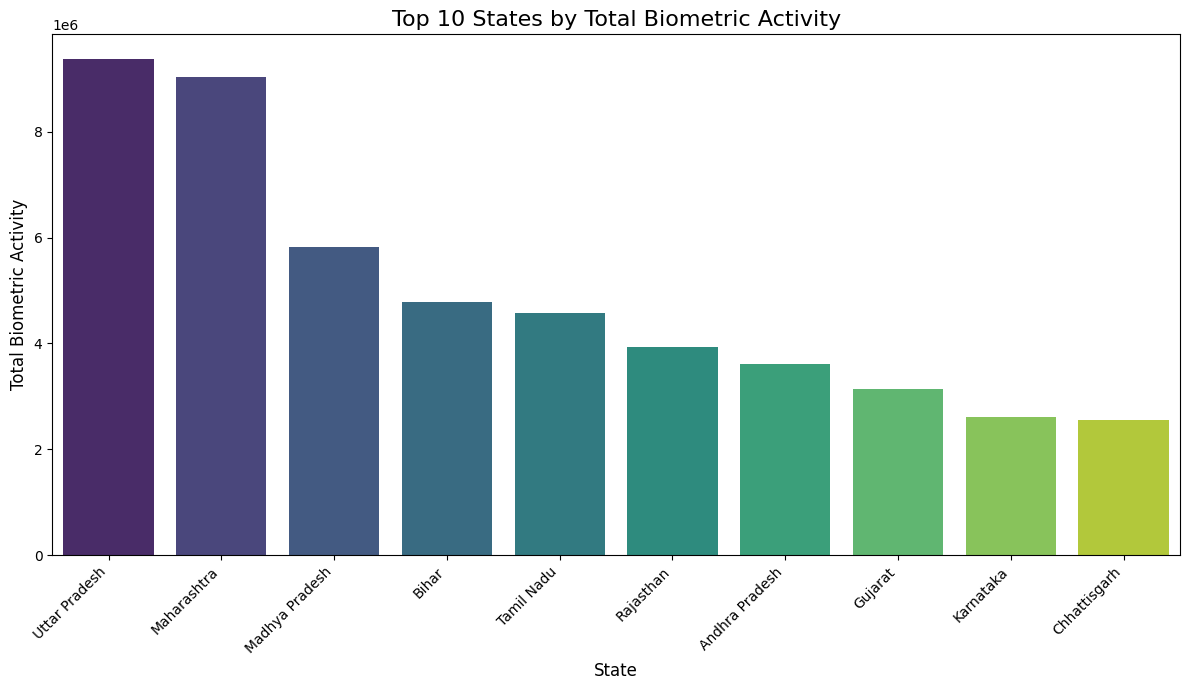

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='total_biometric_activity', data=top_states, palette='viridis', hue='state', legend=False)
plt.title('Top 10 States by Total Biometric Activity', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Biometric Activity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## States by Low Biometric Activity

In [ ]:
low_states = df_state_activity.sort_values(by='total_biometric_activity', ascending=True).head(10)

print(f"Top 10 States with Lowest Total Biometric Activity:")
print(low_states)


Top 10 States with Lowest Total Biometric Activity:
                                       state  total_biometric_activity
38                                    odisha                        15
19                               Lakshadweep                      4745
18                                    Ladakh                      5659
8                              Daman and Diu                      8862
0                Andaman and Nicobar Islands                     19994
31                                    Sikkim                     22576
27                               Pondicherry                     26939
7   Dadra and Nagar Haveli and Daman and Diu                     30030
28                                Puducherry                     41584
10                                       Goa                     66554


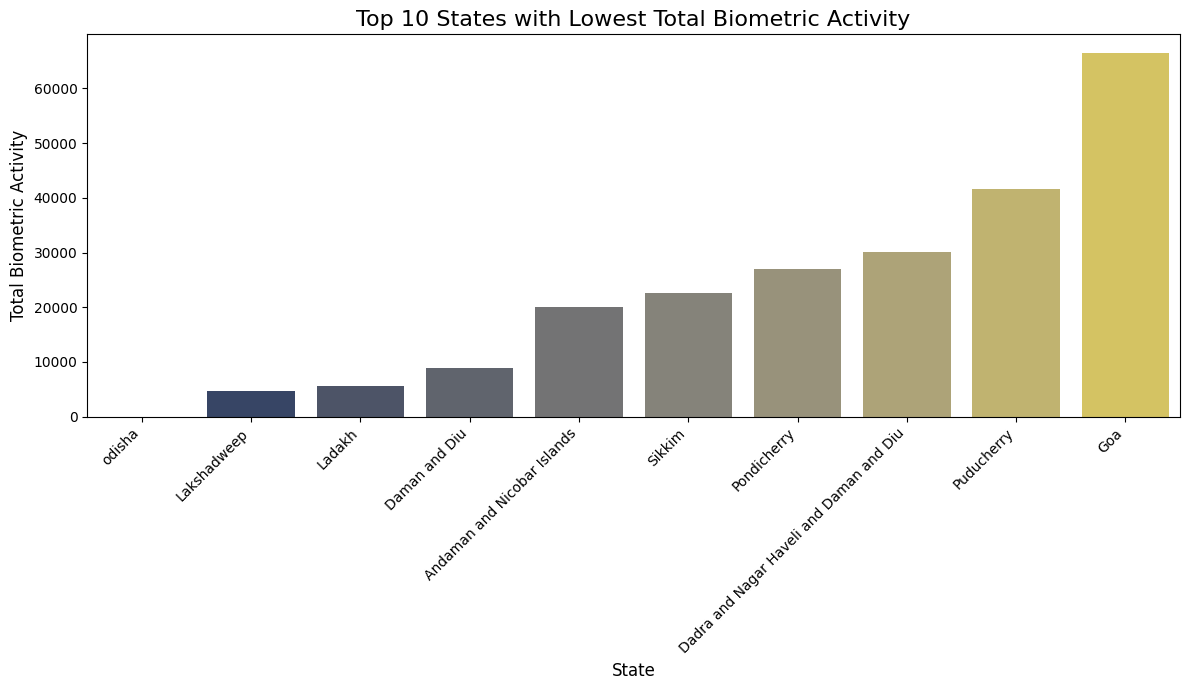

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='state', y='total_biometric_activity', data=low_states, palette='cividis', hue='state', legend=False)
plt.title(f'Top 10 States with Lowest Total Biometric Activity', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Biometric Activity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Top District by Biometric Activity

In [54]:
df['total_biometric_activity'] = df['bio_age_5_17'] + df['bio_age_17_']

df_district_activity = df.groupby(['state', 'district'])['total_biometric_activity'].sum().reset_index()

top_districts = df_district_activity.sort_values(by='total_biometric_activity', ascending=False).head(10)

print("Top 10 district by Total Biometric Activity:")
print(top_districts)

Top 10 district by Total Biometric Activity:
              state    district  total_biometric_activity
519     Maharashtra        Pune                    593592
515     Maharashtra      Nashik                    561893
528     Maharashtra       Thane                    559311
504     Maharashtra     Jalgaon                    408101
225         Gujarat   Ahmedabad                    399202
508     Maharashtra      Mumbai                    395073
485     Maharashtra  Ahmadnagar                    353616
683       Rajasthan      Jaipur                    349532
512     Maharashtra      Nagpur                    342993
27   Andhra Pradesh     Kurnool                    342310


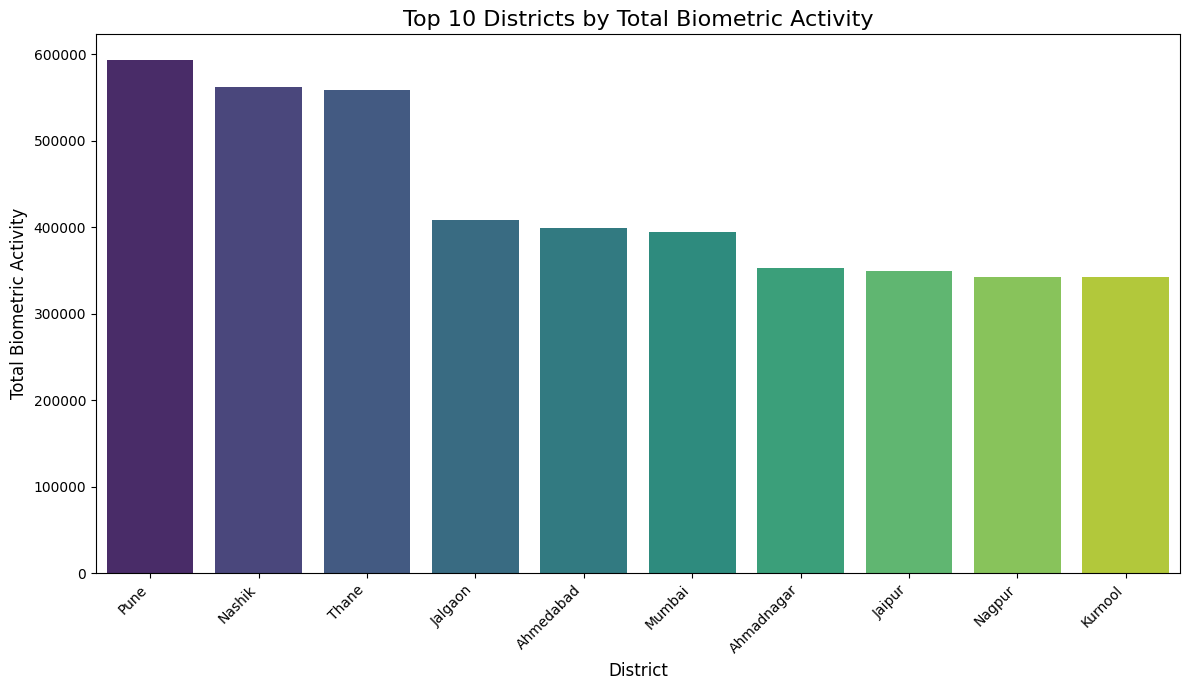

In [55]:
plt.figure(figsize=(12, 7))
sns.barplot(x='district', y='total_biometric_activity', data=top_districts, palette='viridis', hue='district', legend=False)
plt.title('Top 10 Districts by Total Biometric Activity', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Total Biometric Activity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Top District by Low Biometric Activity

In [56]:
low_districts = df_district_activity.sort_values(by='total_biometric_activity', ascending=True).head(10)

print("Top 10 district by lowest Total Biometric Activity:")
print(low_districts)

Top 10 district by lowest Total Biometric Activity:
                           state   district  total_biometric_activity
700                    Rajasthan   Salumbar                         1
304            Jammu and Kashmir   Bandipur                         1
317            Jammu and Kashmir     Poonch                         1
263                      Haryana     Akhera                         1
539                      Manipur   Pherzawl                         2
2    Andaman and Nicobar Islands   Nicobars                         2
223                          Goa    Tiswadi                         2
697                    Rajasthan    Phalodi                         2
919                  West Bengal     Domjur                         3
754                   Tamil Nadu  Tiruvarur                         3


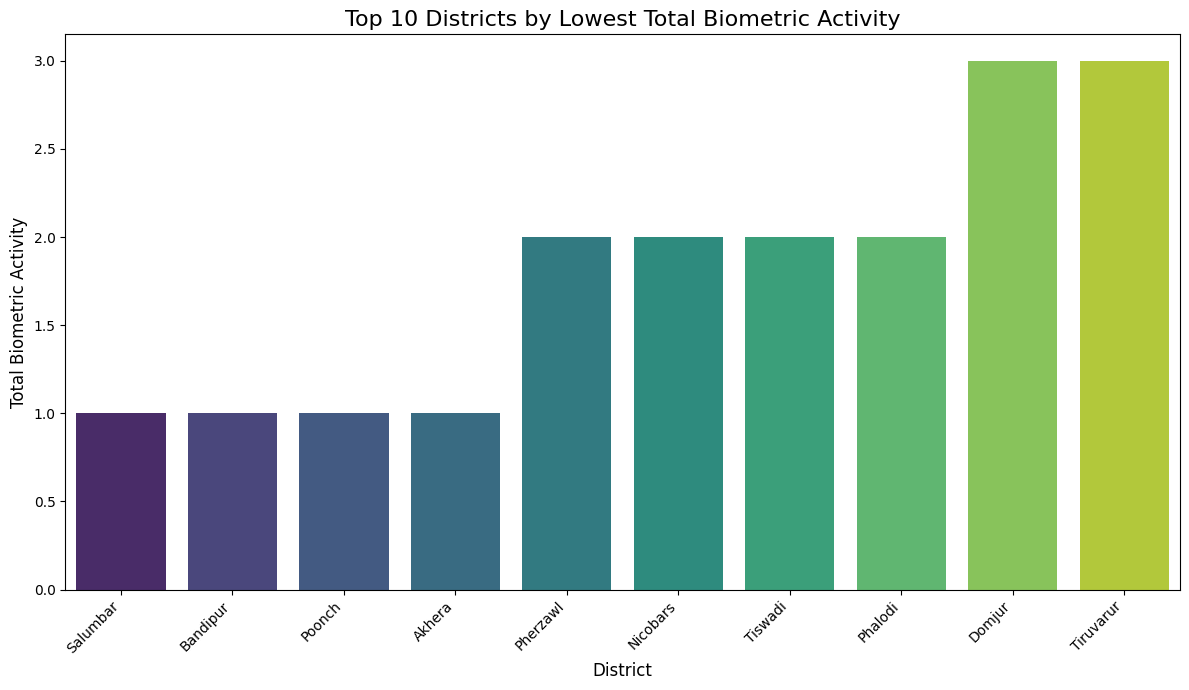

In [58]:
plt.figure(figsize=(12, 7))
sns.barplot(x='district', y='total_biometric_activity', data=low_districts, palette='viridis', hue='district', legend=False)
plt.title('Top 10 Districts by Lowest Total Biometric Activity', fontsize=16)
plt.xlabel('District', fontsize=12)
plt.ylabel('Total Biometric Activity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Relationship Between Biometric Age Groups



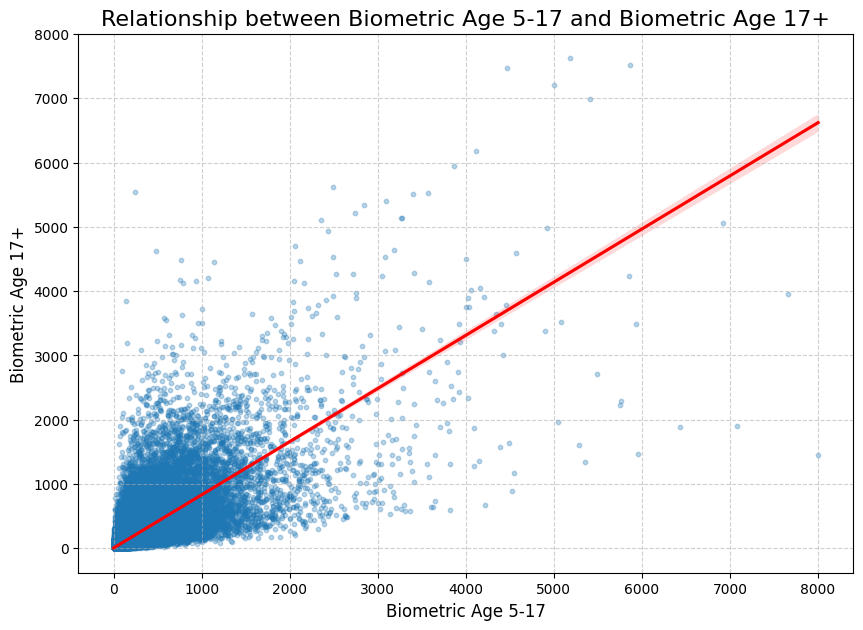

In [ ]:
plt.figure(figsize=(10, 7))
sns.regplot(x='bio_age_5_17', y='bio_age_17_', data=df, scatter_kws={'alpha':0.3, 's':10}, line_kws={'color':'red'})
plt.title('Relationship between Biometric Age 5-17 and Biometric Age 17+', fontsize=16)
plt.xlabel('Biometric Age 5-17', fontsize=12)
plt.ylabel('Biometric Age 17+', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Correlation Heatmap


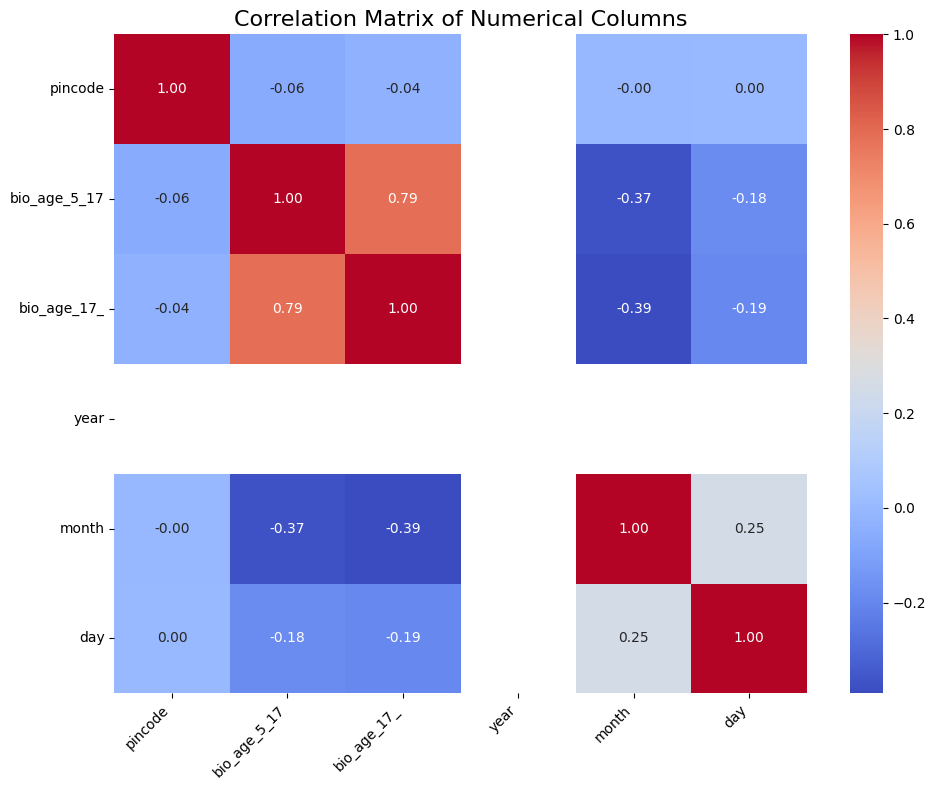

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Columns', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()